# PA approval rate visualization and analysis

In this notebook, we look at how PA approval rates relate to two or more of the following factors: reject_code, correct_diagnosis, tried_and_failed, contraindication, drug, payer BIN.

In [1]:
# We first import all the libraries needed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
cmm = pd.read_csv("Data/CMM.csv")

In [3]:
cmm_pa = cmm[cmm['dim_pa_id'].notna()]
cmm_pa_train, cmm_pa_test = train_test_split(cmm_pa, test_size = 0.2, 
                                             random_state = 10475, shuffle = True,
                                            stratify = cmm_pa.pa_approved)
cmm_pa_train.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,correct_diagnosis,tried_and_failed,contraindication,pa_approved
849303,849304,353147.0,737,417740,C,75.0,0,2019-01-07,2019,1,7,2,1,1,0,1.0,0.0,1.0,1.0
1052005,1052006,437248.0,879,417614,A,70.0,0,2019-05-29,2019,5,29,4,1,1,0,1.0,1.0,0.0,1.0
636661,636662,264336.0,564,417380,A,75.0,0,2018-07-18,2018,7,18,4,1,1,0,1.0,1.0,1.0,1.0
151948,151949,63019.0,140,417740,B,70.0,0,2017-05-20,2017,5,20,7,0,0,0,0.0,1.0,1.0,0.0
1214236,1214237,505068.0,1000,417740,C,75.0,0,2019-09-27,2019,9,27,6,1,1,0,1.0,0.0,0.0,1.0


### Encode Reject codes and drugs

In [145]:
label = LabelEncoder()

cmm_pa_train.loc[:,'drug_label'] = label.fit_transform(cmm_pa_train.loc[:,'drug'].copy()).copy()
cmm_pa_train.loc[:,'reject_code_label'] = label.fit_transform(cmm_pa_train.loc[:,'reject_code'].copy()).copy()
cmm_pa_train.loc[:,'bin_label'] = label.fit_transform(cmm_pa_train.loc[:,'bin'].copy()).copy()

cmm_pa_train.head()

# Not sure what to do with this warning.

/Users/yueqiao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/yueqiao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,...,is_weekday,is_workday,is_holiday,correct_diagnosis,tried_and_failed,contraindication,pa_approved,drug_label,reject_code_label,bin_label
849303,849304,353147.0,737,417740,C,75.0,0,2019-01-07,2019,1,...,1,1,0,1.0,0.0,1.0,1.0,2,1,2
1052005,1052006,437248.0,879,417614,A,70.0,0,2019-05-29,2019,5,...,1,1,0,1.0,1.0,0.0,1.0,0,0,1
636661,636662,264336.0,564,417380,A,75.0,0,2018-07-18,2018,7,...,1,1,0,1.0,1.0,1.0,1.0,0,1,0
151948,151949,63019.0,140,417740,B,70.0,0,2017-05-20,2017,5,...,0,0,0,0.0,1.0,1.0,0.0,1,0,2
1214236,1214237,505068.0,1000,417740,C,75.0,0,2019-09-27,2019,9,...,1,1,0,1.0,0.0,0.0,1.0,2,1,2


## Scatter graphs of interactions of two categories

We will see how two of the factors interact and affects the PA approval rate.

In [146]:
# Models containing two categories
models = [['pa_approved','reject_code_label', 'correct_diagnosis'], 
          ['pa_approved','reject_code_label', 'tried_and_failed'],
         ['pa_approved','reject_code_label', 'contraindication'], 
          ['pa_approved','reject_code_label', 'drug_label'],
         ['pa_approved','correct_diagnosis', 'tried_and_failed'], 
          ['pa_approved','correct_diagnosis', 'contraindication'],
         ['pa_approved','correct_diagnosis', 'drug_label'], 
          ['pa_approved','tried_and_failed', 'contraindication'],
         ['pa_approved','tried_and_failed', 'drug_label'], 
          ['pa_approved','contraindication','drug_label'],
          ['pa_approved','reject_code_label', 'bin_label'],
         ['pa_approved','correct_diagnosis', 'bin_label'],
         ['pa_approved','contraindication', 'bin_label'],
         ['pa_approved','tried_and_failed', 'bin_label'],
         ['pa_approved','drug_label', 'bin_label']] 


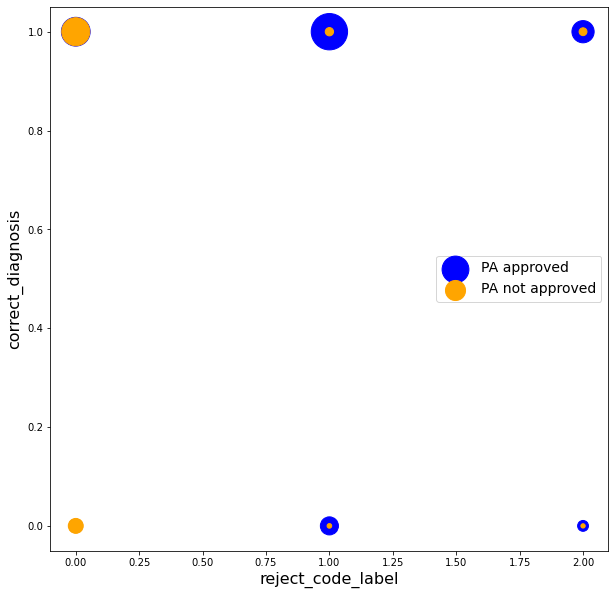

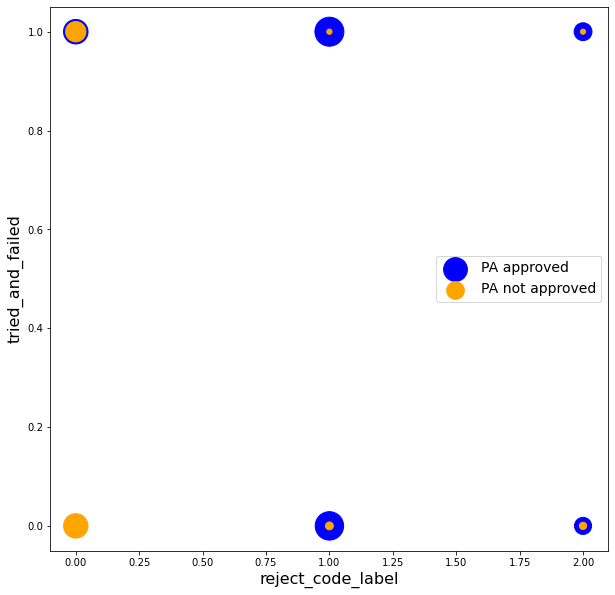

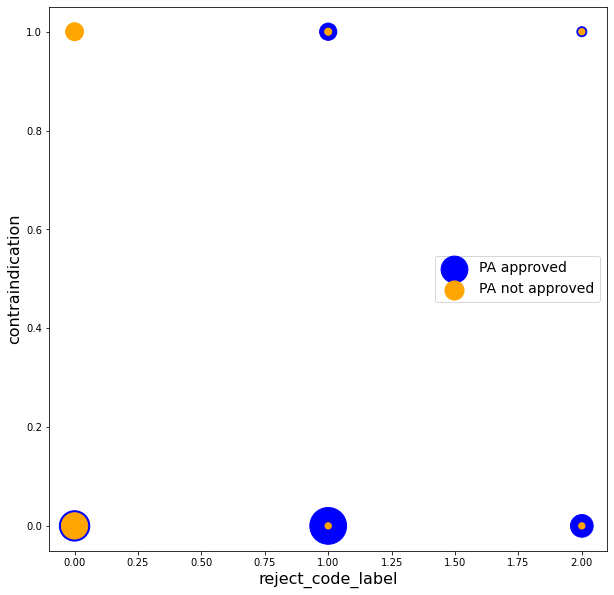

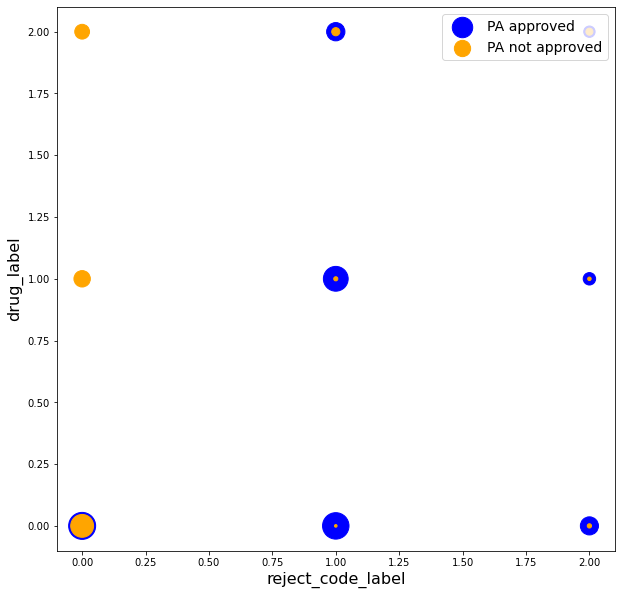

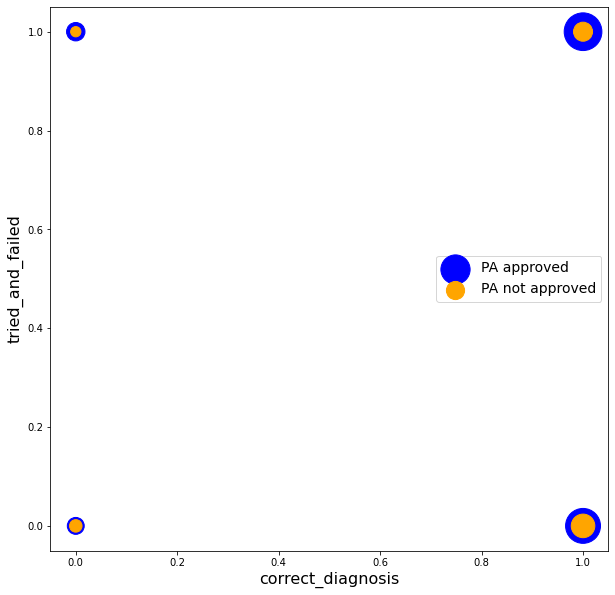

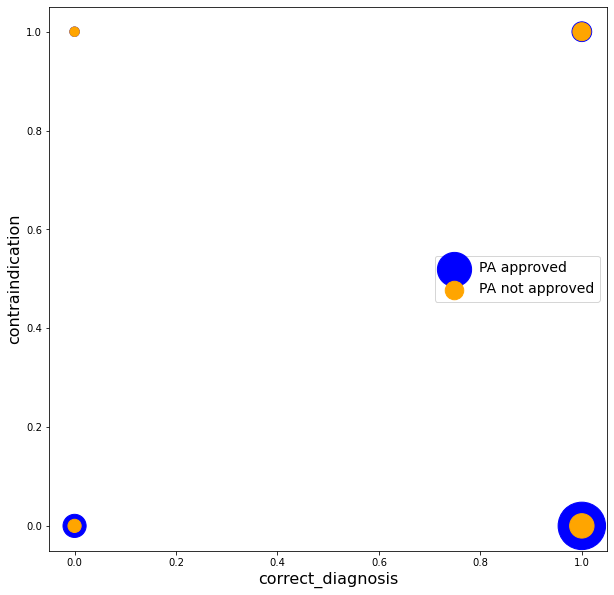

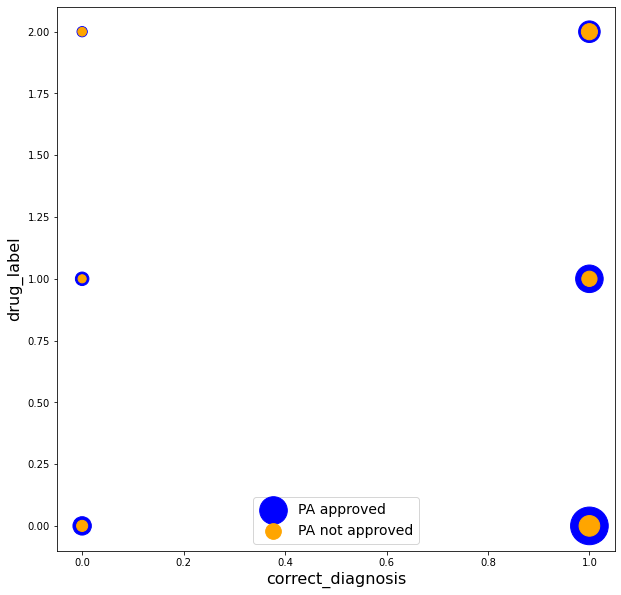

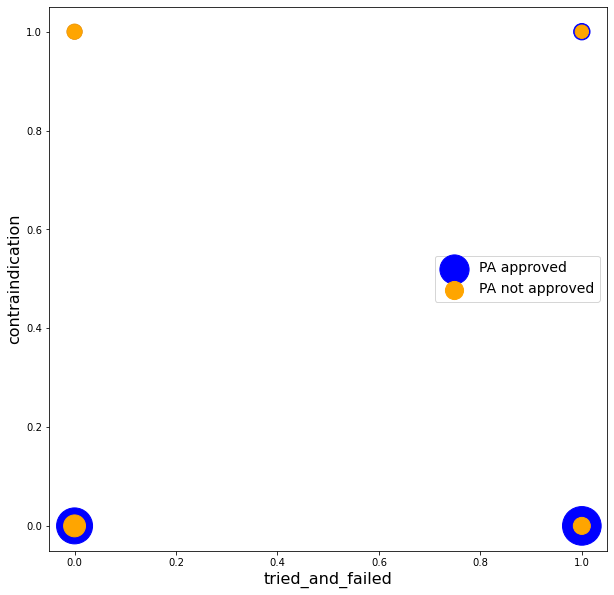

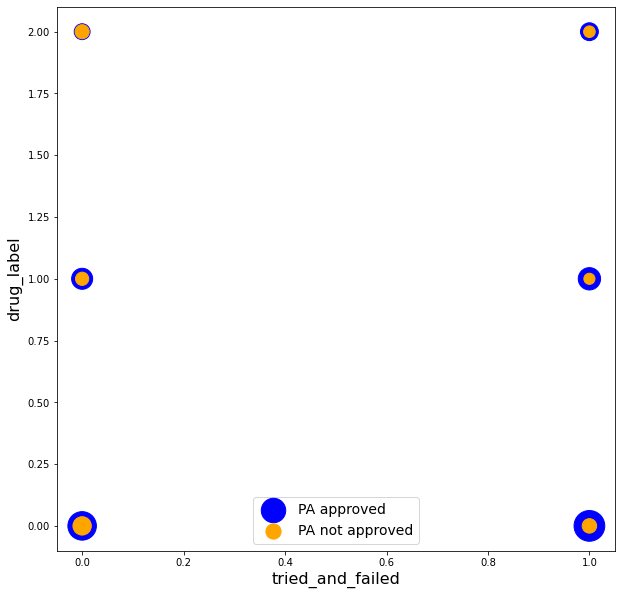

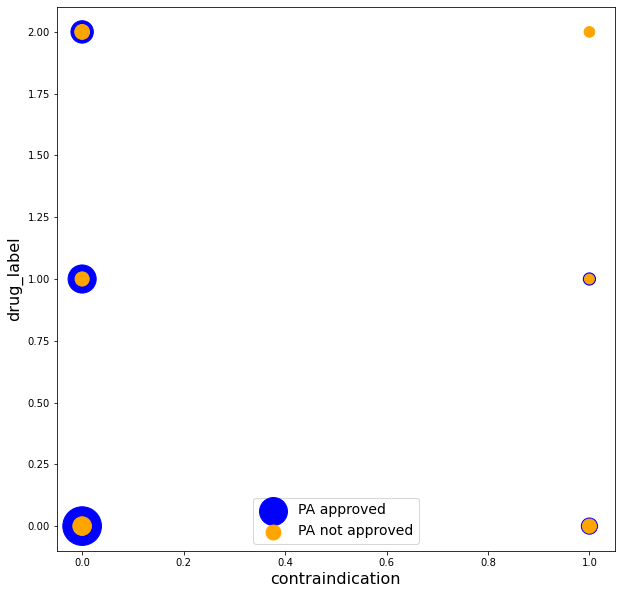

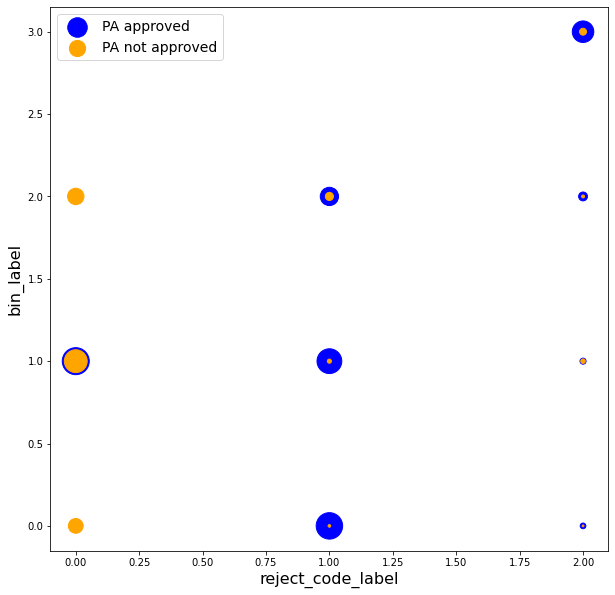

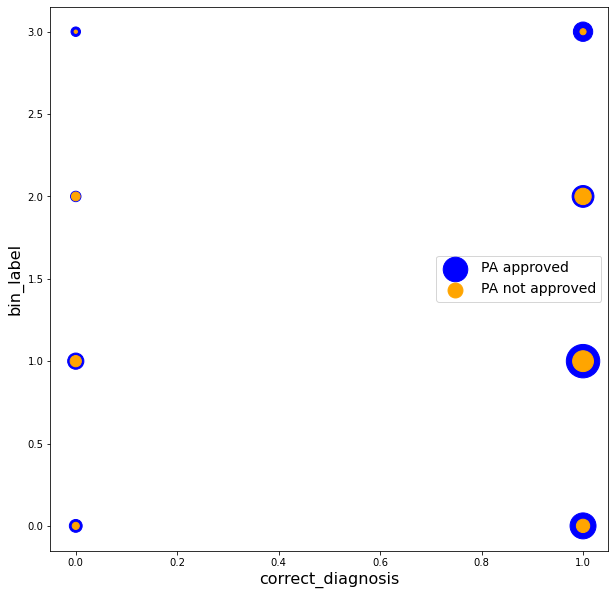

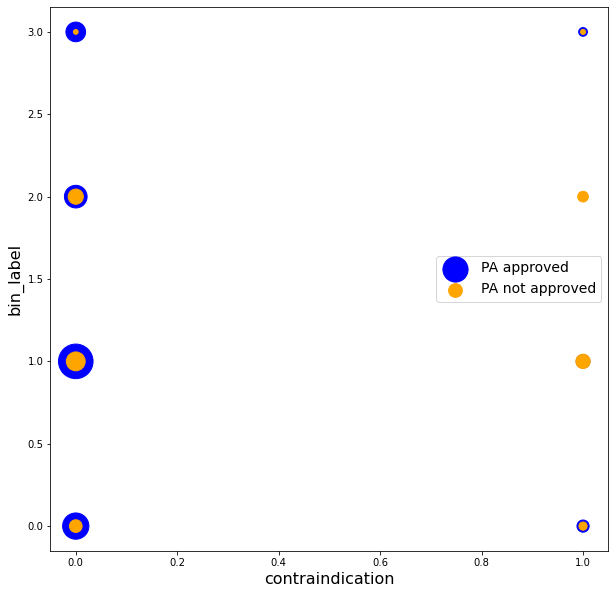

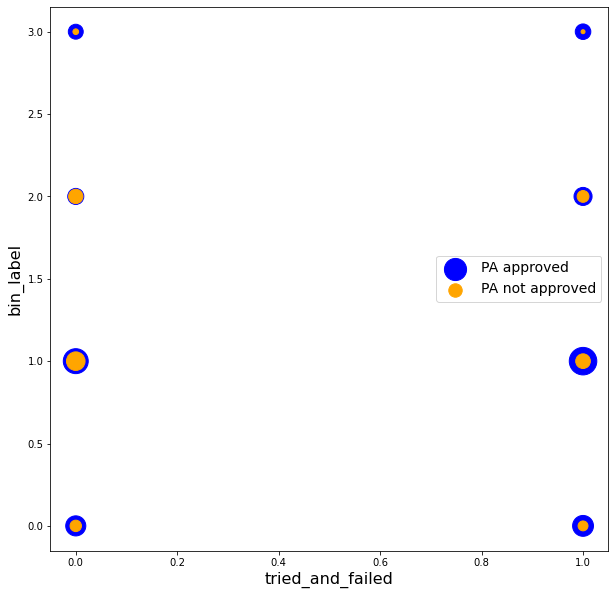

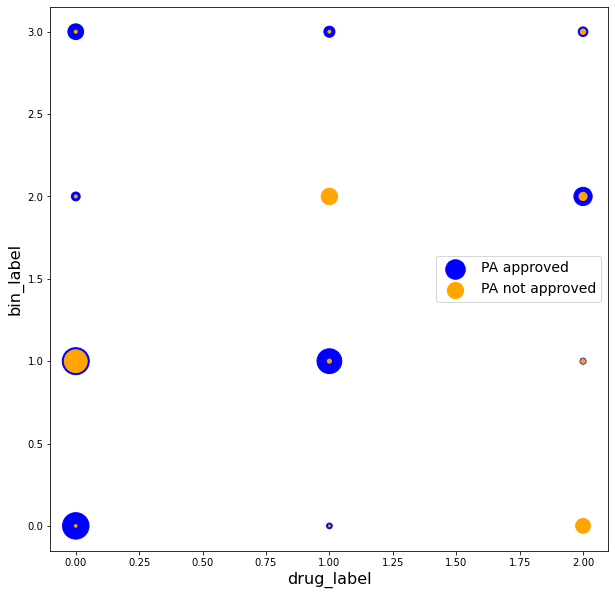

In [147]:
#A scaling constant for the area of scatter plot
alpha = 0.01

for model in models:
    # A new dataframe storing number of occurences of each possibility
    occurence_df = pd.DataFrame(cmm_pa_train[model].value_counts().copy())
    occurence_df = occurence_df.reset_index()
    column = model.copy()
    column.append('counts')
    occurence_df.columns = column
    
    # A scatter graph showing how two categories interact with each other. 
    # For example, if model = ['pa_approved', 'correct_diagnosis', 'contraindication'], 
    # then the graph shows 8 points, in four locations (0,0), (1,0), (0,1) and (1,1).
    # The areas of two points at (1,0) shows the number of PA approved claims vs PA not approved claims
    # when the diagnosis is correct and there is no contraindication.
    plt.figure(figsize = (10,10))

    plt.scatter(occurence_df[model[1]][occurence_df.pa_approved==1],
            occurence_df[model[2]][occurence_df.pa_approved==1],
            occurence_df['counts'][occurence_df.pa_approved==1]*alpha,
            c='blue', label="PA approved")
    
    plt.scatter(occurence_df[model[1]][occurence_df.pa_approved==0],
            occurence_df[model[2]][occurence_df.pa_approved==0],
            occurence_df['counts'][occurence_df.pa_approved==0]*alpha,
            c='orange', label="PA not approved")

    plt.xlabel(model[1],fontsize = 16)
    plt.ylabel(model[2],fontsize = 16)
    plt.legend(fontsize='14', title_fontsize='16')
    plt.show()
    

## Numerical analysis of interactions of two categories

We will see the PA approval rate in each fixed values of two categories.

In [148]:
for model in models:
    # A new dataframe storing number of occurences of each possibility
    occurence_df = pd.DataFrame(cmm_pa_train[model].value_counts(sort=False).copy())
    occurence_df = occurence_df.reset_index()
    column = model.copy()
    column.append('counts')
    occurence_df.columns = column

    # print the numerical data
    print(model[1], "vs", model[2], ":")
    for i in range(int(len(occurence_df)/2)):
        percentage = occurence_df.loc[i+int(len(occurence_df)/2), 'counts']/(occurence_df.loc[i, 'counts']
                                                  +occurence_df.loc[i+int(len(occurence_df)/2), 'counts'])
        percentage = round(percentage*100, 2)
        print("The percentage of PA approval when ", model[1], "is", occurence_df.loc[i, model[1]],
              "and ", model[2], "is ", occurence_df.loc[i, model[2]], "is ", percentage,"%")
    print(" ")

reject_code_label vs correct_diagnosis :
The percentage of PA approval when  reject_code_label is 0 and  correct_diagnosis is  0.0 is  44.68 %
The percentage of PA approval when  reject_code_label is 0 and  correct_diagnosis is  1.0 is  51.22 %
The percentage of PA approval when  reject_code_label is 1 and  correct_diagnosis is  0.0 is  93.88 %
The percentage of PA approval when  reject_code_label is 1 and  correct_diagnosis is  1.0 is  95.03 %
The percentage of PA approval when  reject_code_label is 2 and  correct_diagnosis is  0.0 is  86.38 %
The percentage of PA approval when  reject_code_label is 2 and  correct_diagnosis is  1.0 is  88.9 %
 
reject_code_label vs tried_and_failed :
The percentage of PA approval when  reject_code_label is 0 and  tried_and_failed is  0.0 is  40.47 %
The percentage of PA approval when  reject_code_label is 0 and  tried_and_failed is  1.0 is  59.25 %
The percentage of PA approval when  reject_code_label is 1 and  tried_and_failed is  0.0 is  92.83 %
The

tried_and_failed vs bin_label :
The percentage of PA approval when  tried_and_failed is 0.0 and  bin_label is  0 is  75.58 %
The percentage of PA approval when  tried_and_failed is 0.0 and  bin_label is  1 is  64.33 %
The percentage of PA approval when  tried_and_failed is 0.0 and  bin_label is  2 is  55.69 %
The percentage of PA approval when  tried_and_failed is 0.0 and  bin_label is  3 is  87.3 %
The percentage of PA approval when  tried_and_failed is 1.0 and  bin_label is  0 is  81.63 %
The percentage of PA approval when  tried_and_failed is 1.0 and  bin_label is  1 is  77.89 %
The percentage of PA approval when  tried_and_failed is 1.0 and  bin_label is  2 is  70.09 %
The percentage of PA approval when  tried_and_failed is 1.0 and  bin_label is  3 is  93.82 %
 
drug_label vs bin_label :
The percentage of PA approval when  drug_label is 0 and  bin_label is  0 is  99.02 %
The percentage of PA approval when  drug_label is 0 and  bin_label is  1 is  58.23 %
The percentage of PA approv

### Numerical analysis of interactions of two or more categories

In [149]:
## Make all potential feature combos
# This function was modified from stackexchange user hughdbrown 
# at this link, 
# https://stackoverflow.com/questions/1482308/how-to-get-all-subsets-of-a-set-powerset

# This returns the power set of a set minus the empty set
def powerset(s):
    power_set = []
    x = len(s)
    for i in range(1 << x):
        power_set.append([s[j] for j in range(x) if (i & (1 << j))])
        
    return power_set[1:]

In [150]:
all_models = powerset(['reject_code_label',
                       'correct_diagnosis',
                       'contraindication',
                       'tried_and_failed',
                       'drug_label', 'bin_label'])

In [151]:
# extra_models contrains combinations of three or more factors
extra_models = []

for model in all_models:
    if len(model)>2:
        model.insert(0, 'pa_approved')
        extra_models.append(model)

In [152]:
for model in extra_models:
    # A new dataframe storing number of occurences of each possibility
    occurence_df = pd.DataFrame(cmm_pa_train[model].value_counts(sort=False).copy())
    occurence_df = occurence_df.reset_index()
    column = model.copy()
    column.append('counts')
    occurence_df.columns = column
    #print(occurence_df)
    
    #print header
    for i in range(1, len(model)):
        print(model[i], end = " ")
        
    print(":")   
    
    #print the data analysis
    for j in range(int(len(occurence_df)/2)):
        percentage = occurence_df.loc[j+int(len(occurence_df)/2), 'counts']/(occurence_df.loc[j, 'counts']
                                                  +occurence_df.loc[j+int(len(occurence_df)/2), 'counts'])
        percentage = round(percentage*100, 2)
        print("The percentage of PA approval when ")
        for k in range (1, len(model)):
            print(model[k], "is", occurence_df.loc[j, model[k]], end=", ")
        print("is", percentage, "%")
        
    print(" ")

reject_code_label correct_diagnosis contraindication :
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 0.0, is 51.7 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 1.0, is 17.15 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 1.0, contraindication is 0.0, is 58.57 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 1.0, contraindication is 1.0, is 21.92 %
The percentage of PA approval when 
reject_code_label is 1, correct_diagnosis is 0.0, contraindication is 0.0, is 96.51 %
The percentage of PA approval when 
reject_code_label is 1, correct_diagnosis is 0.0, contraindication is 1.0, is 83.23 %
The percentage of PA approval when 
reject_code_label is 1, correct_diagnosis is 1.0, contraindication is 0.0, is 97.28 %
The percentage of PA approval when 
reject_code_label is 1, correct_diagnosis is 1.0, contra

reject_code_label contraindication drug_label :
The percentage of PA approval when 
reject_code_label is 0, contraindication is 0.0, drug_label is 0, is 66.09 %
The percentage of PA approval when 
reject_code_label is 0, contraindication is 0.0, drug_label is 1, is 45.53 %
The percentage of PA approval when 
reject_code_label is 0, contraindication is 0.0, drug_label is 2, is 38.75 %
The percentage of PA approval when 
reject_code_label is 0, contraindication is 1.0, drug_label is 0, is 26.93 %
The percentage of PA approval when 
reject_code_label is 0, contraindication is 1.0, drug_label is 1, is 12.34 %
The percentage of PA approval when 
reject_code_label is 0, contraindication is 1.0, drug_label is 2, is 9.78 %
The percentage of PA approval when 
reject_code_label is 1, contraindication is 0.0, drug_label is 0, is 99.75 %
The percentage of PA approval when 
reject_code_label is 1, contraindication is 0.0, drug_label is 1, is 99.13 %
The percentage of PA approval when 
reject_code_l

reject_code_label tried_and_failed drug_label :
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 0.0, drug_label is 0, is 48.63 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 0.0, drug_label is 1, is 29.47 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 0.0, drug_label is 2, is 23.95 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 1.0, drug_label is 0, is 67.72 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 1.0, drug_label is 1, is 48.18 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 1.0, drug_label is 2, is 41.65 %
The percentage of PA approval when 
reject_code_label is 1, tried_and_failed is 0.0, drug_label is 0, is 98.51 %
The percentage of PA approval when 
reject_code_label is 1, tried_and_failed is 0.0, drug_label is 1, is 96.09 %
The percentage of PA approval when 
reject_code_

contraindication tried_and_failed drug_label :
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 0.0, drug_label is 0, is 75.7 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 0.0, drug_label is 1, is 75.55 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 0.0, drug_label is 2, is 62.42 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 1.0, drug_label is 0, is 86.55 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 1.0, drug_label is 1, is 83.87 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 1.0, drug_label is 2, is 76.34 %
The percentage of PA approval when 
contraindication is 1.0, tried_and_failed is 0.0, drug_label is 0, is 50.32 %
The percentage of PA approval when 
contraindication is 1.0, tried_and_failed is 0.0, drug_label is 1, is 55.91 %
The percentage of PA approval when 
contra

reject_code_label correct_diagnosis contraindication tried_and_failed drug_label :
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 0.0, drug_label is 0, is 50.79 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 0.0, drug_label is 1, is 29.03 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 0.0, drug_label is 2, is 22.52 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 1.0, drug_label is 0, is 71.21 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 1.0, drug_label is 1, is 50.1 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindica

reject_code_label correct_diagnosis bin_label :
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, bin_label is 0, is 26.82 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, bin_label is 1, is 53.22 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, bin_label is 2, is 33.68 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 1.0, bin_label is 0, is 34.36 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 1.0, bin_label is 1, is 59.48 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 1.0, bin_label is 2, is 40.18 %
The percentage of PA approval when 
reject_code_label is 1, correct_diagnosis is 0.0, bin_label is 0, is 98.7 %
The percentage of PA approval when 
reject_code_label is 1, correct_diagnosis is 0.0, bin_label is 1, is 96.49 %
The percentage of PA approval when 
reject_code_l

reject_code_label tried_and_failed bin_label :
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 0.0, bin_label is 0, is 23.95 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 0.0, bin_label is 1, is 48.63 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 0.0, bin_label is 2, is 29.47 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 1.0, bin_label is 0, is 41.65 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 1.0, bin_label is 1, is 67.72 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 1.0, bin_label is 2, is 48.18 %
The percentage of PA approval when 
reject_code_label is 1, tried_and_failed is 0.0, bin_label is 0, is 98.51 %
The percentage of PA approval when 
reject_code_label is 1, tried_and_failed is 0.0, bin_label is 1, is 96.09 %
The percentage of PA approval when 
reject_code_label is 

contraindication tried_and_failed bin_label :
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 0.0, bin_label is 0, is 78.07 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 0.0, bin_label is 1, is 70.36 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 0.0, bin_label is 2, is 61.99 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 0.0, bin_label is 3, is 92.13 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 1.0, bin_label is 0, is 84.08 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 1.0, bin_label is 1, is 83.71 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 1.0, bin_label is 2, is 76.12 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 1.0, bin_label is 3, is 96.73 %
The percentage of PA approval when 
contraindicati

reject_code_label correct_diagnosis contraindication tried_and_failed bin_label :
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 0.0, bin_label is 0, is 22.52 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 0.0, bin_label is 1, is 50.79 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 0.0, bin_label is 2, is 29.03 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 1.0, bin_label is 0, is 41.84 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 1.0, bin_label is 1, is 71.21 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication 

reject_code_label is 2, correct_diagnosis is 1.0, contraindication is 1.0, tried_and_failed is 0.0, bin_label is 0, is 70.92 %
The percentage of PA approval when 
reject_code_label is 2, correct_diagnosis is 1.0, contraindication is 1.0, tried_and_failed is 0.0, bin_label is 1, is 20.81 %
The percentage of PA approval when 
reject_code_label is 2, correct_diagnosis is 1.0, contraindication is 1.0, tried_and_failed is 0.0, bin_label is 2, is 66.26 %
The percentage of PA approval when 
reject_code_label is 2, correct_diagnosis is 1.0, contraindication is 1.0, tried_and_failed is 0.0, bin_label is 3, is 68.93 %
The percentage of PA approval when 
reject_code_label is 2, correct_diagnosis is 1.0, contraindication is 1.0, tried_and_failed is 1.0, bin_label is 0, is 82.08 %
The percentage of PA approval when 
reject_code_label is 2, correct_diagnosis is 1.0, contraindication is 1.0, tried_and_failed is 1.0, bin_label is 1, is 44.44 %
The percentage of PA approval when 
reject_code_label is 2

contraindication drug_label bin_label :
The percentage of PA approval when 
contraindication is 0.0, drug_label is 0, bin_label is 0, is 99.75 %
The percentage of PA approval when 
contraindication is 0.0, drug_label is 0, bin_label is 1, is 66.09 %
The percentage of PA approval when 
contraindication is 0.0, drug_label is 0, bin_label is 2, is 94.61 %
The percentage of PA approval when 
contraindication is 0.0, drug_label is 0, bin_label is 3, is 98.52 %
The percentage of PA approval when 
contraindication is 0.0, drug_label is 1, bin_label is 0, is 95.06 %
The percentage of PA approval when 
contraindication is 0.0, drug_label is 1, bin_label is 1, is 99.13 %
The percentage of PA approval when 
contraindication is 0.0, drug_label is 1, bin_label is 2, is 45.53 %
The percentage of PA approval when 
contraindication is 0.0, drug_label is 1, bin_label is 3, is 97.05 %
The percentage of PA approval when 
contraindication is 0.0, drug_label is 2, bin_label is 0, is 38.75 %
The percentage 

reject_code_label correct_diagnosis contraindication drug_label bin_label :
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 0.0, drug_label is 0, bin_label is 1, is 61.04 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 0.0, drug_label is 1, bin_label is 2, is 39.8 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 0.0, drug_label is 2, bin_label is 0, is 32.05 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 1.0, drug_label is 0, bin_label is 1, is 22.68 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 1.0, drug_label is 1, bin_label is 2, is 9.31 %
The percentage of PA approval when 
reject_code_label is 0, correct_diagnosis is 0.0, contraindication is 1.0, drug_label is 2, bin_label is 0, is 6.51

reject_code_label tried_and_failed drug_label bin_label :
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 0.0, drug_label is 0, bin_label is 1, is 48.63 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 0.0, drug_label is 1, bin_label is 2, is 29.47 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 0.0, drug_label is 2, bin_label is 0, is 23.95 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 1.0, drug_label is 0, bin_label is 1, is 67.72 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 1.0, drug_label is 1, bin_label is 2, is 48.18 %
The percentage of PA approval when 
reject_code_label is 0, tried_and_failed is 1.0, drug_label is 2, bin_label is 0, is 41.65 %
The percentage of PA approval when 
reject_code_label is 1, tried_and_failed is 0.0, drug_label is 0, bin_label is 0, is 98.51 %
The percentage of PA approval when 
rej

correct_diagnosis is 1.0, tried_and_failed is 1.0, drug_label is 1, bin_label is 0, is 94.63 %
The percentage of PA approval when 
correct_diagnosis is 1.0, tried_and_failed is 1.0, drug_label is 1, bin_label is 1, is 98.69 %
The percentage of PA approval when 
correct_diagnosis is 1.0, tried_and_failed is 1.0, drug_label is 1, bin_label is 2, is 49.47 %
The percentage of PA approval when 
correct_diagnosis is 1.0, tried_and_failed is 1.0, drug_label is 1, bin_label is 3, is 95.86 %
The percentage of PA approval when 
correct_diagnosis is 1.0, tried_and_failed is 1.0, drug_label is 2, bin_label is 0, is 43.25 %
The percentage of PA approval when 
correct_diagnosis is 1.0, tried_and_failed is 1.0, drug_label is 2, bin_label is 1, is 75.08 %
The percentage of PA approval when 
correct_diagnosis is 1.0, tried_and_failed is 1.0, drug_label is 2, bin_label is 2, is 89.65 %
The percentage of PA approval when 
correct_diagnosis is 1.0, tried_and_failed is 1.0, drug_label is 2, bin_label is 3,

contraindication tried_and_failed drug_label bin_label :
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 0.0, drug_label is 0, bin_label is 0, is 99.59 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 0.0, drug_label is 0, bin_label is 1, is 56.36 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 0.0, drug_label is 0, bin_label is 2, is 92.4 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 0.0, drug_label is 0, bin_label is 3, is 97.66 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 0.0, drug_label is 1, bin_label is 0, is 92.54 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 0.0, drug_label is 1, bin_label is 1, is 98.59 %
The percentage of PA approval when 
contraindication is 0.0, tried_and_failed is 0.0, drug_label is 1, bin_label is 2, is 35.2 %
The percentage of PA approval when 

reject_code_label is 2, contraindication is 1.0, tried_and_failed is 1.0, drug_label is 0, bin_label is 2, is 83.35 %
The percentage of PA approval when 
reject_code_label is 2, contraindication is 1.0, tried_and_failed is 1.0, drug_label is 0, bin_label is 3, is 92.57 %
The percentage of PA approval when 
reject_code_label is 2, contraindication is 1.0, tried_and_failed is 1.0, drug_label is 1, bin_label is 0, is 80.92 %
The percentage of PA approval when 
reject_code_label is 2, contraindication is 1.0, tried_and_failed is 1.0, drug_label is 1, bin_label is 3, is 83.61 %
The percentage of PA approval when 
reject_code_label is 2, contraindication is 1.0, tried_and_failed is 1.0, drug_label is 2, bin_label is 1, is 42.59 %
The percentage of PA approval when 
reject_code_label is 2, contraindication is 1.0, tried_and_failed is 1.0, drug_label is 2, bin_label is 3, is 57.11 %
 
correct_diagnosis contraindication tried_and_failed drug_label bin_label :
The percentage of PA approval when 

correct_diagnosis is 1.0, contraindication is 1.0, tried_and_failed is 0.0, drug_label is 1, bin_label is 0, is 70.92 %
The percentage of PA approval when 
correct_diagnosis is 1.0, contraindication is 1.0, tried_and_failed is 0.0, drug_label is 1, bin_label is 1, is 87.03 %
The percentage of PA approval when 
correct_diagnosis is 1.0, contraindication is 1.0, tried_and_failed is 0.0, drug_label is 1, bin_label is 2, is 6.85 %
The percentage of PA approval when 
correct_diagnosis is 1.0, contraindication is 1.0, tried_and_failed is 0.0, drug_label is 1, bin_label is 3, is 70.7 %
The percentage of PA approval when 
correct_diagnosis is 1.0, contraindication is 1.0, tried_and_failed is 0.0, drug_label is 2, bin_label is 0, is 5.32 %
The percentage of PA approval when 
correct_diagnosis is 1.0, contraindication is 1.0, tried_and_failed is 0.0, drug_label is 2, bin_label is 1, is 20.81 %
The percentage of PA approval when 
correct_diagnosis is 1.0, contraindication is 1.0, tried_and_failed

reject_code_label is 2, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 0.0, drug_label is 2, bin_label is 3, is 72.13 %
The percentage of PA approval when 
reject_code_label is 2, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 1.0, drug_label is 0, bin_label is 2, is 95.85 %
The percentage of PA approval when 
reject_code_label is 2, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 1.0, drug_label is 0, bin_label is 3, is 99.13 %
The percentage of PA approval when 
reject_code_label is 2, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 1.0, drug_label is 1, bin_label is 0, is 95.83 %
The percentage of PA approval when 
reject_code_label is 2, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 1.0, drug_label is 1, bin_label is 3, is 97.87 %
The percentage of PA approval when 
reject_code_label is 2, correct_diagnosis is 0.0, contraindication is 0.0, tried_and_failed is 1.0, 